<a href="https://colab.research.google.com/github/kassio077/Aprendizado-de-maquina-na-pratica/blob/master/Atividade_2_classificador_deteccao_de_intrusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados de detcção de intrusão na rede**

O Dataset consiste em informações de um ambiente simulado de ataques a uma LAN (Network de Área Local) Militar. A base de dados é composta por 42 atributos e 25192 instâncias que estão classificadas como normal ou anormaly. Os atributos descrevem se uma conexão representa ou não um ataque de intruso a rede.

Link para o dataset: [link text](https://www.kaggle.com/sampadab17/network-intrusion-detection?select=Train_data.csv)

#**1. Carregando os dados**




In [25]:
from google.colab import drive


import numpy as np
import pandas as pd

dados = pd.read_csv('sample_data/data/Train_data.csv')

dados.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:

drive.mount('/content/drive')

In [ ]:
dados.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

#**2. Limpeza e organização dos dados**

Alguns atributos não estão contribuindo para a classificação, pois estão com valores comuns para as instâncias. Por isso aplicamos a remoção de alguns deles.
O atributo que representa a classificação foi transformado em numérico para ser utilizado em algumas técnicas de análise.

In [26]:
#Remoção dos atributos
dados = dados.drop(columns=['land','wrong_fragment','urgent','hot','num_failed_logins',
                            'num_compromised','root_shell','su_attempted','num_root',
                            'num_file_creations','num_shells','num_access_files',
                            'num_outbound_cmds','is_host_login','is_guest_login'])

#Transformando o atributo categorico em numérico.
dados['class'] = dados['class'].replace(['anomaly','normal'],[1,0])

dados['protocol_type'] = dados['protocol_type'].replace(['tcp','udp','icmp'],['001','010','100'])







Normalizando os atributos numéricos, através da re-escala usando máximo e mínimo:

In [4]:
#dados['count'] = dados['count']/dados['count'].max()
#dados['srv_count'] = dados['srv_count']/dados['srv_count'].max()




# atributos_numericos = dados.iloc[:,4:26]
# atributos_numericos = (atributos_numericos - atributos_numericos.min())/(atributos_numericos.max()-atributos_numericos.min())

# atributos_numericos.head()





,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1.286320e-06,0.000000,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,3.824902e-07,0.000000,0.0,0.023529,0.000000,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.000000e+00,0.000000,0.0,0.239216,0.009804,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,6.077927e-07,0.001583,1.0,0.007843,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,5.213394e-07,0.000082,1.0,0.056863,0.060784,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#**3. Análise dos dados**

##3.1 Histograma

O gráfico mostra que as classes estão razoavelmente balanceadas.

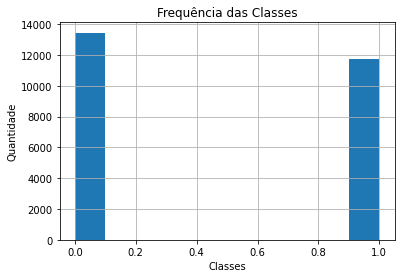

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dados['class'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Frequência das Classes')
plt.grid(True)
plt.show()

In [ ]:
#Quantidade de classes 
print('Normal:',dados[dados['class']==0].shape[0])
print('Anomaly:',dados[dados['class']==1].shape[0])

Normal: 13449
Anomaly: 11743


Quantidade de ocorrências dos valores de alguns atributos.

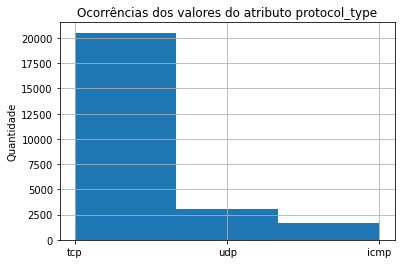

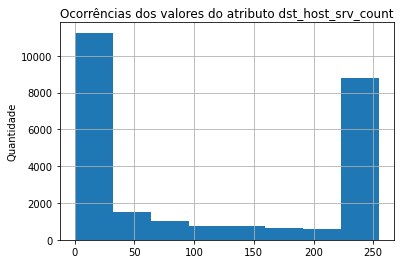

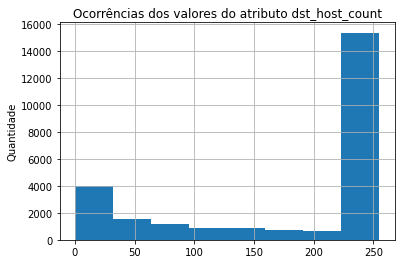

In [ ]:
plt.hist(dados['protocol_type'],3)
plt.ylabel('Quantidade')
plt.title('Ocorrências dos valores do atributo protocol_type')
plt.grid(True)
plt.show()

plt.hist(dados['dst_host_srv_count'],8)
plt.ylabel('Quantidade')
plt.title('Ocorrências dos valores do atributo dst_host_srv_count')
plt.grid(True)
plt.show()

plt.hist(dados['dst_host_count'],8)
plt.ylabel('Quantidade')
plt.title('Ocorrências dos valores do atributo dst_host_count')
plt.grid(True)
plt.show()



Com a plotagem dos gráficos percebemos que alguns valores de atributos estão se sobressaindo aos demais.

#**4. Distribuição de probabilidade**

Utilizamos um gráfico continuo para analisar melhor a distribuição de ocorrências do atributo **srv_count**.

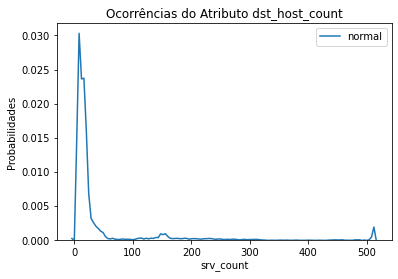

In [ ]:
import seaborn as sns

sns.distplot(dados.srv_count, hist=False, rug=False,label='normal')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo dst_host_count')
plt.show()

##BoxPlot

Com o boxplot percebemos que existe uma grande quantidade de valores de atributos fora da curva, pegando como exemplo o atributo **dst_host_same_src_port_rate**, podemos verificar estas ocorrências.

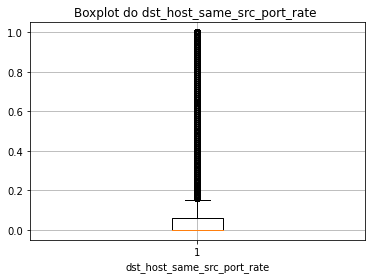

In [ ]:
plt.boxplot(dados.dst_host_same_src_port_rate)
plt.title('Boxplot do dst_host_same_src_port_rate ')
plt.xlabel('dst_host_same_src_port_rate')
plt.grid()
plt.show()

#**5. Comparando atributos**
Separamos as instâncias classificadas como conexôes normais e anormais. Os resultados da plotagem dos gráficos mostram que existem atributos com escala diferente.

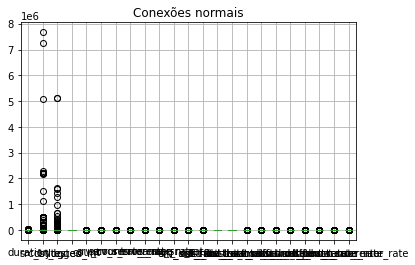

In [ ]:
#Dataframe apenas para as conexões normais
normal = dados[dados['class']==0].drop(columns=['class']).reset_index(drop=True)

#Dataframe apenas para as conexões anomaly
anomaly = dados[dados['class']==1].drop(columns=['class']).reset_index(drop=True)

normal.boxplot()
plt.title('Conexões normais')
plt.show()

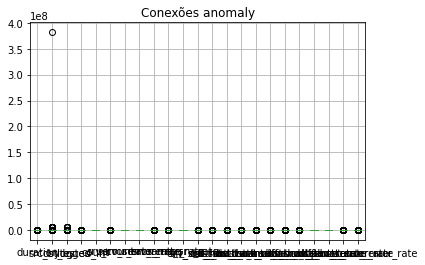

In [ ]:
anomaly.boxplot()
plt.title('Conexões anomaly')
plt.show()

Comparando o atributo ***dst_host_srv_count*** das instâncias classificadas como conexões **nomais** e **anomaly**, percebemos que os valores fora da curva estão presentes nas instâncias classificas como conexôes anomaly.

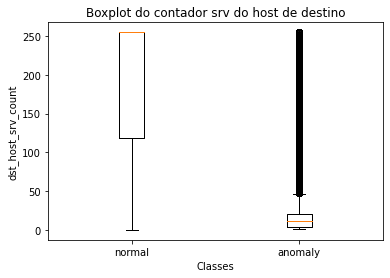

In [ ]:
# box plot comparando o dst_host_srv_count para as duas classes
plt.boxplot([normal.dst_host_srv_count,anomaly.dst_host_srv_count],labels=['normal','anomaly'])
plt.xlabel('Classes')
plt.ylabel('dst_host_srv_count')
plt.title('Boxplot do contador srv do host de destino')
plt.show()

Após comparar cada **Dataframe** específico com os atributos **dst_host_srv_count** e **dst_host_count**, verificamos uma diferença nos valores dos atributos de ambas as classes.

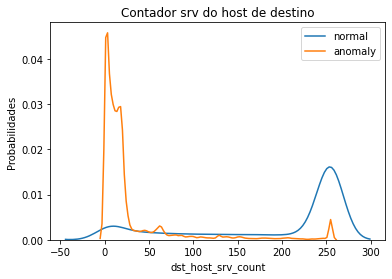

In [ ]:
# distribuição de probabilidade comparando a dst_host_srv_count para as duas classes
sns.distplot(normal.dst_host_srv_count, hist=False, rug=False,label='normal')
sns.distplot(anomaly.dst_host_srv_count, hist=False, rug=False,label='anomaly')
plt.xlabel('dst_host_srv_count')
plt.ylabel('Probabilidades')
plt.title('Contador srv do host de destino')
plt.show()

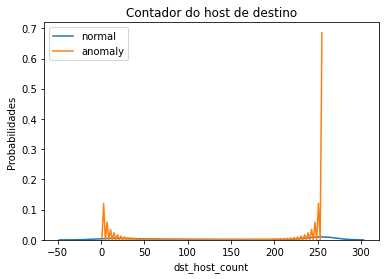

In [ ]:
# distribuição de probabilidade comparando a dst_host_count para as duas classes
sns.distplot(normal.dst_host_count, hist=False, rug=False,label='normal')
sns.distplot(anomaly.dst_host_count, hist=False, rug=False,label='anomaly')
plt.xlabel('dst_host_count')
plt.ylabel('Probabilidades')
plt.title('Contador do host de destino')
plt.show()

#6. Correlação entre atributos

Os resutados da correlação de alguns atributos como o **contador srv host de destino** e **contador host destino**, percebe-se que não estão correlacionados em sua maioria. Para o **tamanho dos pacotes** da fonte em relação o de destino, apresentaram uma quantidade maior correlacionadas. 


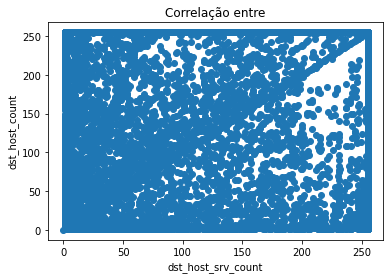

In [ ]:
# plotando correlação entre dst_host_srv_count e dst_host_count
plt.scatter(dados.dst_host_srv_count,dados.dst_host_count)
plt.xlabel('dst_host_srv_count')
plt.ylabel('dst_host_count')
plt.title('Correlação entre contador srv do host de destino e contador host de destino ')
plt.show()

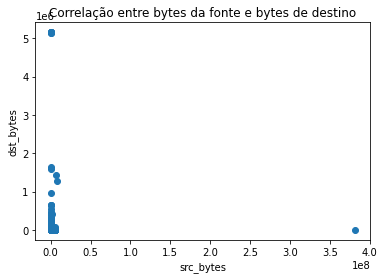

In [ ]:
# plotando correlação entre quantidade de bytes, do pacote da fonte e pacote de destino
plt.scatter(dados.src_bytes,dados.dst_bytes)
plt.xlabel('src_bytes')
plt.ylabel('dst_bytes')
plt.title('Correlação entre bytes da fonte e bytes de destino')
plt.show()



# 7. Preparação dos dados para o classificador


 * Normalizando os atributos numéricos, através da re-escala usando máximo e mínimo.

In [27]:

dados['duration'] = dados['duration']/dados['duration'].max()

atributos_categoricos = dados.iloc[:,0:4]

#Dataframe apenas com as colunas de atributos numéricos.
atributos_numericos = dados.iloc[:,4:26] 
#Aplicando a re-escala.
atributos_numericos = (atributos_numericos - atributos_numericos.min())/(atributos_numericos.max()-atributos_numericos.min())

atributos_numericos['src_bytes'] =  atributos_numericos['src_bytes']/atributos_numericos['src_bytes'].max()



* Separando os atributos descritores do atributo classificador.

In [28]:
atributos_descritores = pd.merge(atributos_categoricos,atributos_numericos, left_index=True, right_index=True)
atributos_descritores.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,001,ftp_data,SF,1.286320e-06,0.000000,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,010,other,SF,3.824902e-07,0.000000,0.0,0.023529,0.000000,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,001,private,S0,0.000000e+00,0.000000,0.0,0.239216,0.009804,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,001,http,SF,6.077927e-07,0.001583,1.0,0.007843,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,001,http,SF,5.213394e-07,0.000082,1.0,0.056863,0.060784,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.0,001,private,REJ,0.000000e+00,0.000000,0.0,0.235294,0.035294,0.0,0.0,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0.0,001,private,S0,0.000000e+00,0.000000,0.0,0.323529,0.015686,1.0,1.0,0.0,0.0,0.05,0.06,0.00,1.000000,0.035294,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0.0,001,private,S0,0.000000e+00,0.000000,0.0,0.227451,0.029412,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.058824,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0.0,001,remote_job,S0,0.000000e+00,0.000000,0.0,0.527451,0.043137,1.0,1.0,0.0,0.0,0.09,0.05,0.00,1.000000,0.090196,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0.0,001,private,S0,0.000000e+00,0.000000,0.0,0.258824,0.013725,1.0,1.0,0.0,0.0,0.06,0.06,0.00,1.000000,0.050980,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [29]:
atributo_classificador = dados['class']
atributo_classificador.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

* Aplicando os subconjuntos de dados para treino e teste do classificador.

In [30]:
from sklearn.model_selection import train_test_split

atributos_descritores_train, atributos_descritores_test, atributo_classificador_train, atributo_classificador_test = train_test_split(atributos_descritores,atributo_classificador, test_size=0.2)#random_state=42

atributos_descritores_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
663,0.0,001,http,SF,5.580166e-07,0.007246,1.0,0.003922,0.005882,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.011765,1.000000,1.00,0.00,0.33,0.01,0.0,0.0,0.00,0.0
14601,0.0,001,X11,REJ,0.000000e+00,0.000000,0.0,0.003922,0.003922,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.000000,0.015686,0.02,0.03,0.00,0.00,0.0,0.0,0.02,1.0
3091,0.0,001,http,SF,5.868343e-07,0.002501,1.0,0.003922,0.003922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.611765,0.611765,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0
1801,0.0,001,finger,SF,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.235294,0.035294,0.02,1.00,0.02,0.22,0.0,0.0,0.92,0.0
5969,0.0,010,private,SF,2.750786e-07,0.000028,0.0,0.001961,0.000000,0.0,0.0,0.0,0.0,0.5,1.0,0.0,1.000000,0.960784,0.96,0.01,0.00,0.00,0.0,0.0,0.00,0.0


In [31]:
atributo_classificador_train.head()

663      0
14601    0
3091     0
1801     1
5969     0
Name: class, dtype: int64

# 8. Definindo o algoritmo de classificação

Os subconjuntos de treino e teste serão aplicados a uma arvore de decisão, para definição do modelo de classificador.

In [34]:
from sklearn.tree import DecisionTreeClassifier

#Definindo modelo
classificador = DecisionTreeClassifier()  

#Treinando o modelo
#classificador.fit(atributos_descritores_train,atributo_classificador_train)

